# Session 9: final projects
- twitter data (con't)
- data visualization and analysis for final project

In [2]:
# import as needed
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

## twitter data
- filename: 2020-07-06_top1000bigrams.csv

In [3]:
# read a file and show detail
#tw = pd.read_csv('data/2020-07-06_top1000bigrams.csv')
tw = pd.read_csv('../sample-code/data/covid-term/2020-05-03_top1000terms.csv', header=None,names=['term','frequency'])
print(tw.head(10))

#get entry for ketword 'covid'
a=tw[tw['term']=='covid']
print('a=\n',a)
b=a.set_index(pd.Index(range(a.shape[0])))  #reset the index
b.loc[0,'frequency']
print('b=\n',b.loc[0]['frequency'])


          term  frequency
0  coronavirus     328383
1        covid     203800
2           19     193076
3      covid19     167520
4          NaN      62057
5       people      46485
6          amp      44220
7        cases      39189
8          new      38259
9          via      35970
a=
        term  frequency
1     covid     203800
1002  covid     203800
b=
 203800


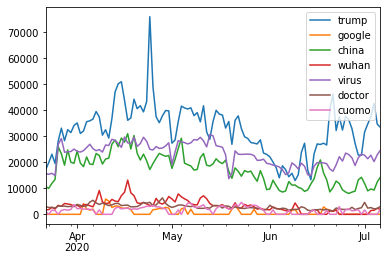

In [4]:
# read all files and plot some information
t_range=pd.date_range('2020-03-22','2020-07-06')
#t_range
#keywords=['covid']
#keywords=['china']

#keywords=['covid','coronavirus','trump','google','china','wuhan','virus']
keywords=['trump','google','china','wuhan','virus','doctor','cuomo']

df = DataFrame(index=t_range)             #a DataFrame to save selected data
folder='../sample-code/data/covid-term/'  #folder with the data files

#loop through each day
for d in t_range:
    filename=folder + str(d)[:10] + '_top1000terms.csv'
    #print('filename --> ',filename)
    tw = pd.read_csv(filename, header=None, names=['term','frequency'])
    
    for key in keywords:
        tw_short=tw[tw['term']==key]
        if tw_short.shape[0]==0:   #check if the key exists or not
            f=0
        else:                      #sometimes there are two duplicates for the entry, not sure why
            tw_short2=tw_short.set_index(pd.Index(range(tw_short.shape[0])))        
            f=tw_short2.loc[0,'frequency']
        df.loc[d,key]=f
df.plot()

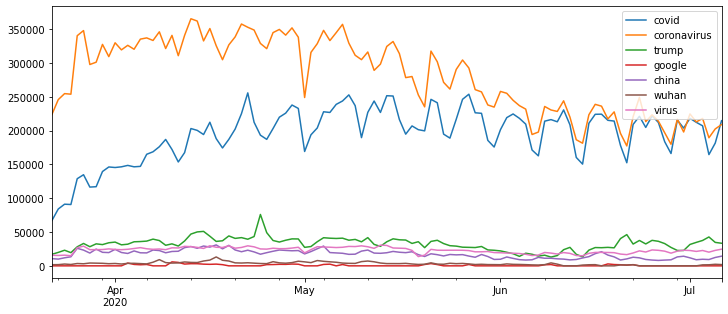

In [13]:
# use it as a function
# read all files and plot some information
def term_plot(keywords):
    t_range=pd.date_range('2020-03-22','2020-07-06')
#t_range
#keywords=['covid']
#keywords=['china']

#keywords=['covid','coronavirus','trump','google','china','wuhan','virus']
#keywords=['trump','google','china','wuhan','virus','doctor','cuomo']

    df = DataFrame(index=t_range)             #a DataFrame to save selected data
    folder='../sample-code/data/covid-term/'  #folder with the data files

    #loop through each day
    for d in t_range:
        filename=folder + str(d)[:10] + '_top1000terms.csv'
        #print('filename --> ',filename)
        tw = pd.read_csv(filename, header=None, names=['term','frequency'])
    
        for key in keywords:
            tw_short=tw[tw['term']==key]
            if tw_short.shape[0]==0:   #check if the key exists or not
                f=0
            else:                      #sometimes there are two duplicates for the entry, not sure why
                tw_short2=tw_short.set_index(pd.Index(range(tw_short.shape[0])))        
                f=tw_short2.loc[0,'frequency']
            df.loc[d,key]=f
    df.plot(figsize=(12,5))
    return df
keywords=['covid','coronavirus','trump','google','china','wuhan','virus']
df=term_plot(keywords)

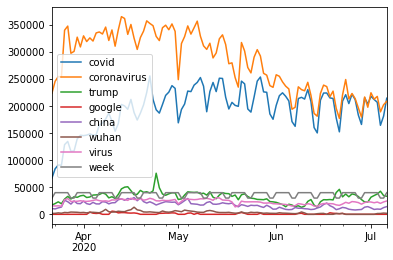

In [14]:
# trying to find the relation between 'covid' tweets and weekends.
# 2020-03-22 is sunday
weekdays=40000
weekends=30000
flag=7  #1-5 for weekdays, 6-7 for weekends
for d in t_range:
    if ( flag <= 5 ):
        #weekdays
        df.loc[d,'week']=weekdays
    else:
        #weekends
        df.loc[d,'week']=weekends
    flag += 1
    if (flag > 7):
        flag = 1
df.plot()

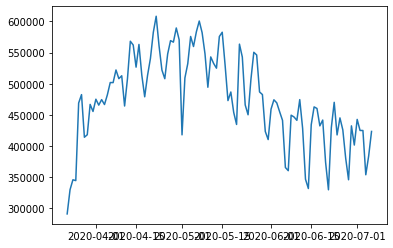

In [15]:
plt.plot(df['covid']+df['coronavirus'])

anaylsis: talk about relation between covid tweets and weekday-weekend schedules.

### More to do
- check the frequency with weekdays and weekends
- check degree of anxiety from the keywords, and relate to daily new cases

## mobility
how people were moving while the period of COVID-19

check out this website 
https://www.google.com/covid19/mobility/


## Final project


### crime data:
- https://ucr.fbi.gov/crime-in-the-u.s/2019/preliminary-report/tables/table-1/table-1.xls
- https://ucr.fbi.gov/hate-crime/2018/tables/table-2.xls
- https://www.fbi.gov/services/cjis/ucr/publications#Hate-Crime%20Statistics

### Presentation